# Hepatotoxicity Exploratory Data Analysis 💀

## 1. Problem 🧐

Identify that the compound is **toxic** or **non-toxic**.

Data:
* CSV (IC50 values, MACCS keys, Klekota-Roth and PubChem substructure fingerprints)
* SDF (series of molfiles)

MACCS keys:
* List of 166 (keys) binary values (0 or 1) which characterize a molecule.
Details: https://github.com/rdkit/rdkit-orig/blob/master/rdkit/Chem/MACCSkeys.py

Klekota-Roth fingerprints:
* Set of 4860 chemical substructures (binary values).
Details: 

PubChem fingerprints:
* 881 binary bits (indicate the presence or absence of a certain group of chemical features in a compound).
Details: https://web.cse.ohio-state.edu/~zhang.10631/bak/drugreposition/list_fingerprints.pdf



### 1.1 Libraries 📖

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MolToSmiles

pd.set_option('display.max_columns', None)

colors_palette = ['#ffa600','#ff6361','#bc5090','#58508d', '#65345a']

### 1.2 Functions

In [2]:
def annotate(ax, fontsize=12):
    for p in ax.patches:
        ax.annotate(format(p.get_height(), ','), 
               (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
               xytext = (0, 6), textcoords = 'offset points', fontsize=fontsize)

## 2. Fingerprints

### 2.1 Loading and cleaning 🧹

In [3]:
def load_and_clean(path, target,):
    df = pd.read_csv(path, sep="\t")
    raw_data = list(df['Field 11'])
    cols = raw_data[0].split(',')
    cols[0] = target
    last = raw_data[-1]
    raw_data = raw_data[1:-1]
    rep_data = []
    for i in range(0, len(raw_data)-1, 2):
        rep_data.append(raw_data[i].split(',') + (raw_data[i+1].split(','))[1:])
    rep_data.append(last.split(','))
    return pd.DataFrame(rep_data, columns = cols)

In [4]:
data_path_hep = "../data/raw/hepatotoxicity_ALT_MACCSFP_ready_set.csv" 
df_hep = pd.read_csv(data_path_hep, sep=",")
print("Examples: {0}, columns: {1}".format(df_hep.shape[0],df_hep.shape[1]))
df_hep.head()

Examples: 196, columns: 1


Field 11
NaN   MACCSFP1 MACCSFP2 MACCSFP3 MACCSFP4 MACCSFP5 MACCSFP6 MACCSFP7 MACCSFP8 MACCSFP9 MACCSFP10 MACCSFP11 MACCSFP12 MACCSFP13 MACCSFP14 MACCSFP15 MACCSFP16 MACCSFP17 MACCSFP18 MACCSFP19 MACCSFP20 MACCSFP21 MACCSFP22 MACCSFP23 MACCSFP24 MACCSFP25 MACCSFP26 MACCSFP27 MACCSFP28 MACCSFP29 MACCSFP30 MACCSFP31 MACCSFP32 MACCSFP33 MACCSFP34 MACCSFP35 MACCSFP36 MACCSFP37 MACCSFP38 MACCSFP39 MACCSFP40 MACCSFP41 MACCSFP42 MACCSFP43 MACCSFP44 MACCSFP45 MACCSFP46 MACCSFP47 MACCSFP48 MACCSFP49 MACCSFP50 MACCSFP51 MACCSFP52 MACCSFP53 MACCSFP54 MACCSFP55 MACCSFP56 MACCSFP57 MACCSFP58 MACCSFP59 MACCSFP60 MACCSFP61 MACCSFP62 MACCSFP63 MACCSFP64 MACCSFP65 MACCSFP66 MACCSFP67 MACCSFP68 MACCSFP69 MACCSFP70 MACCSFP71 MACCSFP72 MACCSFP73 MACCSFP74 MACCSFP75 MACCSFP76 MACCSFP77 MACCSFP78 MACCSFP79 MACCSFP80 MACCSFP81 MACCSFP82 MACCSFP83 MACCSFP84 MACCSFP85 MACCSFP86 MACCSFP87 MACCSFP88 MACCSFP89 MACCSFP90 MACCSFP91 MACCSFP92 MACCSFP93 MACCSFP94 MACCSFP95 MACCSFP96 MACCSFP97 MACCSFP98 MACCSFP99 MACCSFP100 MACCSFP101 MACCSFP102 MACCSFP103 MACCSFP104 MACCSFP105 MACCSFP106 MACCSFP107 MACCSFP108 MACCSFP109 MACCSFP110 MACCSFP111 MACCSFP112 MACCSFP113 MACCSFP114 MACCSFP115 MACCSFP116 MACCSFP117 MACCSFP118 MACCSFP119 MACCSFP120 MACCSFP121 MACCSFP122 MACCSFP123 MACCSFP124 MACCSFP125 MACCSFP126 MACCSFP127 MACCSFP128 MACCSFP129 MACCSFP130 MACCSFP131 MACCSFP132 MACCSFP133 MACCSFP134 MACCSFP135 MACCSFP136 MACCSFP137 MACCSFP138 MACCSFP139 MACCSFP140 MACCSFP141 MACCSFP142 MACCSFP143 MACCSFP144 MACCSFP145 MACCSFP146 MACCSFP147 MACCSFP148 MACCSFP149 MACCSFP150 MACCSFP151 MACCSFP152 MACCSFP153 MACCSFP154 MACCSFP155 MACCSFP156 MACCSFP157 MACCSFP158 MACCSFP159 MACCSFP160 MACCSFP161 MACCSFP162 MACCSFP163 MACCSFP164 MACCSFP165  MACCSFP166
32.6  NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN        NaN                NaN
NaN   0        0        0        0        0        0        0        0        0        0         0         0         0         0         0         0         0         0         0         0         0         1         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0         0   

In [37]:
df_hep_alt = load_and_clean("../data/raw/hepatotoxicity_ALT_MACCSFP_ready_set.csv", 'ALT')
print("Examples: {0}, columns: {1}".format(df_hep_alt.shape[0],df_hep_alt.shape[1]))
df_hep_alt.head()

Examples: 98, columns: 167


ALT MACCSFP1 MACCSFP2 MACCSFP3 MACCSFP4 MACCSFP5 MACCSFP6 MACCSFP7  \
0  32.60        0        0        0        0        0        0        0   
1  37.20        0        0        0        0        0        0        0   
2   2.92        0        0        0        0        0        0        0   
3   3.16        0        0        0        0        0        0        0   
4  44.10        0        0        0        0        0        0        0   

  MACCSFP8 MACCSFP9 MACCSFP10 MACCSFP11 MACCSFP12 MACCSFP13 MACCSFP14  \
0        0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

  MACCSFP15 MACCSFP16 MACCSFP17 MACCSFP18 MACCSFP19 MACCSFP20 MACCSFP21  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP22 MACCSFP23 MACCSFP24 MACCSFP25 MACCSFP26 MACCSFP27 MACCSFP28  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         1         0         0         0         0         0         0   

  MACCSFP29 MACCSFP30 MACCSFP31 MACCSFP32 MACCSFP33 MACCSFP34 MACCSFP35  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP36 MACCSFP37 MACCSFP38 MACCSFP39 MACCSFP40 MACCSFP41 MACCSFP42  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         1         0         0         0         0         0         0   
3         1         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP43 MACCSFP44 MACCSFP45 MACCSFP46 MACCSFP47 MACCSFP48 MACCSFP49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         1         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP50 MACCSFP51 MACCSFP52 MACCSFP53 MACCSFP54 MACCSFP55 MACCSFP56  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         1         0         0         0   

  MACCSFP57 MACCSFP58 MACCSFP59 MACCSFP60 MACCSFP61 MACCSFP62 MACCSFP63  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0   

In [38]:
df_hep_td = load_and_clean("../data/raw/hepatotoxicity_pTD50_MACCSFP_ready_set.csv", 'pTD50')
print("Examples: {0}, columns: {1}".format(df_hep_td.shape[0],df_hep_td.shape[1]))
df_hep_td.head()

Examples: 54, columns: 167


pTD50 MACCSFP1 MACCSFP2 MACCSFP3 MACCSFP4 MACCSFP5 MACCSFP6 MACCSFP7  \
0  1.94        0        0        0        0        0        0        0   
1  1.58        0        0        0        0        0        0        0   
2  3.69        0        0        0        0        0        0        0   
3  2.46        0        0        0        0        0        0        0   
4  1.90        0        0        0        0        0        0        0   

  MACCSFP8 MACCSFP9 MACCSFP10 MACCSFP11 MACCSFP12 MACCSFP13 MACCSFP14  \
0        0        0         0         0         0         0         0   
1        0        0         0         0         0         0         0   
2        0        0         0         0         0         0         0   
3        0        0         0         0         0         0         0   
4        0        0         0         0         0         0         0   

  MACCSFP15 MACCSFP16 MACCSFP17 MACCSFP18 MACCSFP19 MACCSFP20 MACCSFP21  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         1         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP22 MACCSFP23 MACCSFP24 MACCSFP25 MACCSFP26 MACCSFP27 MACCSFP28  \
0         1         0         0         0         0         0         0   
1         0         0         0         0         0         0         1   
2         1         0         0         0         0         0         0   
3         1         0         1         0         0         0         1   
4         1         0         0         0         0         0         0   

  MACCSFP29 MACCSFP30 MACCSFP31 MACCSFP32 MACCSFP33 MACCSFP34 MACCSFP35  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         1         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP36 MACCSFP37 MACCSFP38 MACCSFP39 MACCSFP40 MACCSFP41 MACCSFP42  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

  MACCSFP43 MACCSFP44 MACCSFP45 MACCSFP46 MACCSFP47 MACCSFP48 MACCSFP49  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         1         0         0         0         0         0         1   
4         0         0         0         0         0         0         0   

  MACCSFP50 MACCSFP51 MACCSFP52 MACCSFP53 MACCSFP54 MACCSFP55 MACCSFP56  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         1   
4         0         0         0         1         0         0         0   

  MACCSFP57 MACCSFP58 MACCSFP59 MACCSFP60 MACCSFP61 MACCSFP62 MACCSFP63  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         1   
4         0         0         0      

In [7]:
df_hep_pubchem_alt = pd.read_csv("../data/raw/hepato_alt_pubchem.csv")
print("Examples: {0}, columns: {1}".format(df_hep_pubchem_alt.shape[0],df_hep_pubchem_alt.shape[1]))
df_hep_pubchem_alt.head()

Examples: 98, columns: 882


Name  PubchemFP0  PubchemFP1  \
0  AUTOGEN_hepatotoxicity_chembl_data_ALT_onlynon...           1           1   
1  AUTOGEN_hepatotoxicity_chembl_data_ALT_onlynon...           1           1   
2  AUTOGEN_hepatotoxicity_chembl_data_ALT_onlynon...           1           1   
3  AUTOGEN_hepatotoxicity_chembl_data_ALT_onlynon...           1           1   
4  AUTOGEN_hepatotoxicity_chembl_data_ALT_onlynon...           1           1   

   PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           0           0           0   
4           0           0           0           0           0           0   

   PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0           0           1            1            1            1            0   
1           0           1            1            1            1            0   
2           0           1            1            1            1            0   
3           0           1            1            1            1            0   
4           0           1            1            1            0            0   

   PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0            1            1            0            0            1   
1            1            1            0            0            1   
2            1            0            0            0            1   
3            1            0            0            0            1   
4            0            0            0            0            1   

   PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            1            1            0            0            0   
4            1            1            0            0            0   

   PubchemFP24  PubchemFP25  PubchemFP26  PubchemFP27  PubchemFP28  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP29  PubchemFP30  PubchemFP31  PubchemFP32  PubchemFP33  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            1   
3            0            0            0            0            1   
4            0            0            0            0            0   

   PubchemFP34  PubchemFP35  PubchemFP36  PubchemFP37  PubchemFP38  \
0            0            0            0            1            1   
1            0            0            0            1            1   
2            0            0            0            1            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP39  PubchemFP40  PubchemFP41  PubchemFP42  PubchemFP43  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP44  PubchemFP45  PubchemFP46  PubchemFP47  PubchemFP48  \
0            0       

In [8]:
df_hep_pubchem_td = pd.read_csv("../data/raw/hepato_ptd50_pubchem.csv")
print("Examples: {0}, columns: {1}".format(df_hep_pubchem_td.shape[0],df_hep_pubchem_td.shape[1]))
df_hep_pubchem_td.head()

Examples: 54, columns: 882


Name  PubchemFP0  PubchemFP1  \
0  AUTOGEN_hepatotoxicity_chembl_data_pTD50_54cmds_2           0           0   
1  AUTOGEN_hepatotoxicity_chembl_data_pTD50_54cmds_3           1           0   
2  AUTOGEN_hepatotoxicity_chembl_data_pTD50_54cmds_1           1           0   
3  AUTOGEN_hepatotoxicity_chembl_data_pTD50_54cmds_5           1           0   
4  AUTOGEN_hepatotoxicity_chembl_data_pTD50_54cmds_4           1           0   

   PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  PubchemFP12  PubchemFP13  \
0           0           0            0            0            0            0   
1           0           1            1            0            0            0   
2           0           1            1            0            0            0   
3           0           1            1            0            0            0   
4           0           1            1            0            0            0   

   PubchemFP14  PubchemFP15  PubchemFP16  PubchemFP17  PubchemFP18  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            1            0            0            0   
3            1            1            0            0            0   
4            1            1            0            0            1   

   PubchemFP19  PubchemFP20  PubchemFP21  PubchemFP22  PubchemFP23  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            1            0            0            0            0   

   PubchemFP24  PubchemFP25  PubchemFP26  PubchemFP27  PubchemFP28  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP29  PubchemFP30  PubchemFP31  PubchemFP32  PubchemFP33  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP34  PubchemFP35  PubchemFP36  PubchemFP37  PubchemFP38  \
0            0            0            0            1            1   
1            0            0            0            1            0   
2            0            0            0            1            1   
3            0            0            0            1            0   
4            0            0            0            0            0   

   PubchemFP39  PubchemFP40  PubchemFP41  PubchemFP42  PubchemFP43  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   PubchemFP44  PubchemFP45  PubchemFP46  PubchemFP47  PubchemFP48  \
0            0       

In [9]:
df_hep_klek_alt = load_and_clean("../data/raw/hepatotoxicity_ALT_KlekFP_ready_set.csv", 'ALT')
print("Examples: {0}, columns: {1}".format(df_hep_klek_alt.shape[0],df_hep_klek_alt.shape[1]))
df_hep_klek_alt.head()

Examples: 98, columns: 4861


ALT KRFP1 KRFP2 KRFP3 KRFP4 KRFP5 KRFP6 KRFP7 KRFP8 KRFP9 KRFP10 KRFP11  \
0  32.60     1     0     0     0     0     0     0     0     0      0      0   
1  37.20     1     0     0     0     0     0     0     0     0      0      0   
2   2.92     0     0     0     0     0     0     0     0     0      0      0   
3   3.16     0     0     0     0     0     0     0     0     0      0      0   
4  44.10     1     1     0     0     0     0     0     0     0      0      0   

  KRFP12 KRFP13 KRFP14 KRFP15 KRFP16 KRFP17 KRFP18 KRFP19 KRFP20 KRFP21  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP22 KRFP23 KRFP24 KRFP25 KRFP26 KRFP27 KRFP28 KRFP29 KRFP30 KRFP31  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP32 KRFP33 KRFP34 KRFP35 KRFP36 KRFP37 KRFP38 KRFP39 KRFP40 KRFP41  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      1      0      0      0      0      0      0      0   

  KRFP42 KRFP43 KRFP44 KRFP45 KRFP46 KRFP47 KRFP48 KRFP49 KRFP50 KRFP51  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP52 KRFP53 KRFP54 KRFP55 KRFP56 KRFP57 KRFP58 KRFP59 KRFP60 KRFP61  \
0      0      0      0      1      0      0      0      0      0      0   
1      0      0      0      1      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP62 KRFP63 KRFP64 KRFP65 KRFP66 KRFP67 KRFP68 KRFP69 KRFP70 KRFP71  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP72 KRFP73 KRFP74 KRFP75 KRFP76 KRFP77 KRFP78 KRFP79 KRFP80 KRFP81  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP82 KRFP83 KRFP84 KRFP85 KRFP86 KRFP87 KRFP88 KRFP89 KRFP90 KRFP91  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0   

In [10]:
df_hep_klek_td = load_and_clean("../data/raw/hepatotoxicity_pTD50_KlekFP_ready_set.csv", '')
print("Examples: {0}, columns: {1}".format(df_hep_klek_td.shape[0],df_hep_klek_td.shape[1]))
df_hep_klek_td.head()

Examples: 54, columns: 4861


KRFP1 KRFP2 KRFP3 KRFP4 KRFP5 KRFP6 KRFP7 KRFP8 KRFP9 KRFP10 KRFP11  \
0  1.94     0     0     0     0     0     0     0     0     0      0      0   
1  1.58     0     0     0     0     0     0     0     0     0      0      0   
2  3.69     0     0     0     0     0     0     0     0     0      0      0   
3  2.46     0     0     0     0     0     0     0     0     0      0      0   
4  1.90     0     0     0     0     0     0     0     0     0      0      0   

  KRFP12 KRFP13 KRFP14 KRFP15 KRFP16 KRFP17 KRFP18 KRFP19 KRFP20 KRFP21  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP22 KRFP23 KRFP24 KRFP25 KRFP26 KRFP27 KRFP28 KRFP29 KRFP30 KRFP31  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP32 KRFP33 KRFP34 KRFP35 KRFP36 KRFP37 KRFP38 KRFP39 KRFP40 KRFP41  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP42 KRFP43 KRFP44 KRFP45 KRFP46 KRFP47 KRFP48 KRFP49 KRFP50 KRFP51  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP52 KRFP53 KRFP54 KRFP55 KRFP56 KRFP57 KRFP58 KRFP59 KRFP60 KRFP61  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP62 KRFP63 KRFP64 KRFP65 KRFP66 KRFP67 KRFP68 KRFP69 KRFP70 KRFP71  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP72 KRFP73 KRFP74 KRFP75 KRFP76 KRFP77 KRFP78 KRFP79 KRFP80 KRFP81  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP82 KRFP83 KRFP84 KRFP85 KRFP86 KRFP87 KRFP88 KRFP89 KRFP90 KRFP91  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4

### 2.2 Data Analyse and Preprocessing 📊

### 2.2.1 Missing/Invalid values 🔎

In [11]:
# count missing values
print("Missing values: {0}".format(df_hep_alt.isnull().sum().sum()))
print("Missing values: {0}".format(df_hep_td.isnull().sum().sum()))

print("Missing values: {0}".format(df_hep_pubchem_alt.isnull().sum().sum()))
print("Missing values: {0}".format(df_hep_pubchem_td.isnull().sum().sum()))

print("Missing values: {0}".format(df_hep_klek_alt.isnull().sum().sum()))
print("Missing values: {0}".format(df_hep_klek_td.isnull().sum().sum()))

Missing values: 0
Missing values: 0
Missing values: 0
Missing values: 0
Missing values: 0
Missing values: 0


In [12]:
# Convert non-numeric entries to NaN (everything that cannot be converted to a numeric value)
df_hep_alt2 = (df_hep_alt.drop(df_hep_alt.columns, axis=1)
               .join(df_hep_alt[df_hep_alt.columns].apply(pd.to_numeric, errors='coerce')))

print("Invalid values: {0}".format(df_hep_alt2.isnull().sum().sum()))

df_hep_td2 = (df_hep_td.drop(df_hep_td.columns, axis=1)
               .join(df_hep_td[df_hep_td.columns].apply(pd.to_numeric, errors='coerce')))

print("Invalid values: {0}".format(df_hep_td2.isnull().sum().sum()))

Invalid values: 0
Invalid values: 0


### 2.2.2 Class balance/Outliers

In [13]:
df_hep_alt2['ALT'].describe()

count     98.000000
mean      47.119898
std       45.294039
min        1.510000
25%       29.775000
50%       36.300000
75%       49.000000
max      273.000000
Name: ALT, dtype: float64

In [14]:
df_hep_td2['pTD50'].describe()

count    54.000000
mean      2.869074
std       1.247381
min       0.930000
25%       1.992500
50%       2.880000
75%       3.375000
max       8.870000
Name: pTD50, dtype: float64

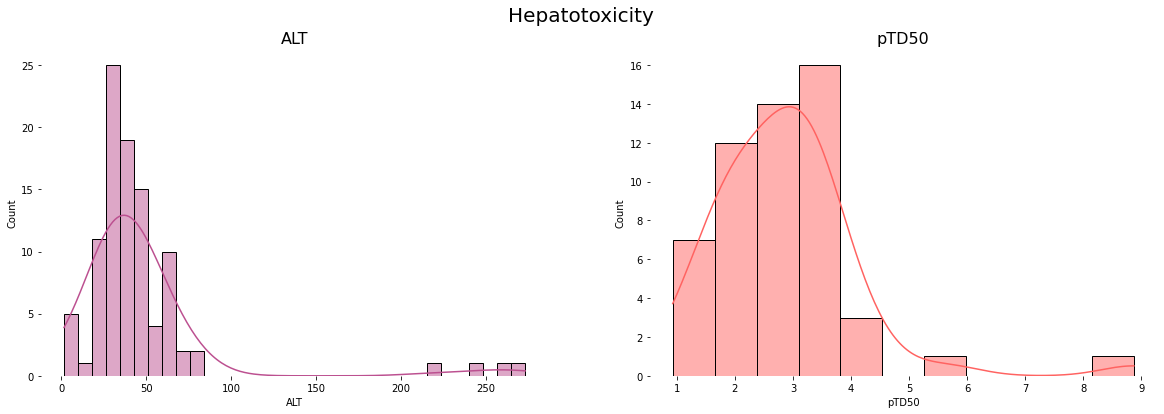

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Hepatotoxicity', fontsize=20)
left = sns.histplot(data=df_hep_alt2, x='ALT', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=df_hep_td2, x='pTD50', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('ALT', fontsize=16)
axes[1].set_title('pTD50', fontsize=16)

sns.despine(left=True, bottom=True)

In [16]:
df_scaled = StandardScaler().fit_transform(df_hep_alt2['ALT'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.0121508 ]
 [-1.00371804]
 [-0.99528528]
 [-0.98086083]
 [-0.97553487]
 [-0.66840489]
 [-0.60183047]
 [-0.60183047]
 [-0.60183047]
 [-0.56632412]]

outer range (high) of the distribution:
[[0.37459432]
 [0.43229215]
 [0.46336021]
 [0.61648138]
 [0.716343  ]
 [0.72965789]
 [3.83646406]
 [4.44672956]
 [4.74631444]
 [5.01261211]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [17]:
df_scaled = StandardScaler().fit_transform(df_hep_td2['pTD50'][:,np.newaxis]);
low_range = df_scaled[df_scaled[:,0].argsort()][:10]
high_range= df_scaled[df_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.56911293]
 [-1.42345561]
 [-1.32635073]
 [-1.17260134]
 [-1.08358854]
 [-1.04312817]
 [-1.01885195]
 [-0.92174707]
 [-0.80845805]
 [-0.80036598]]

outer range (high) of the distribution:
[[0.6238389 ]
 [0.64002305]
 [0.66429926]
 [0.74522   ]
 [0.76140414]
 [0.94752183]
 [1.19028402]
 [1.31166512]
 [2.25843768]
 [4.85599316]]


/home/ewelina/miniconda3/envs/admet/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


### 2.2.3 Classes statistics 📈

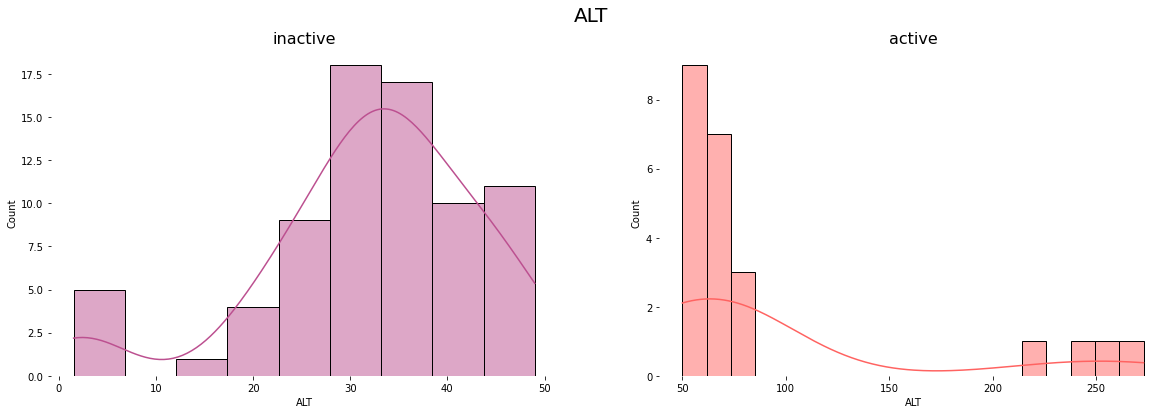

In [18]:
ALT_1 = df_hep_alt2[df_hep_alt2['ALT']<50]
ALT_2 = df_hep_alt2[df_hep_alt2['ALT']>=50]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('ALT', fontsize=20)
left = sns.histplot(data=ALT_1, x='ALT', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=ALT_2, x='ALT', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

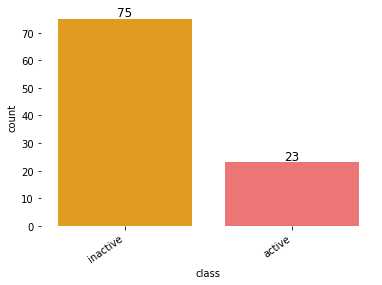

In [20]:
activity_th = []
for i in df_hep_alt2.ALT:
    if float(i) < 50:
        activity_th.append("inactive")
    elif float(i) >= 50:
        activity_th.append("active")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_hep_alt2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'ALT value')

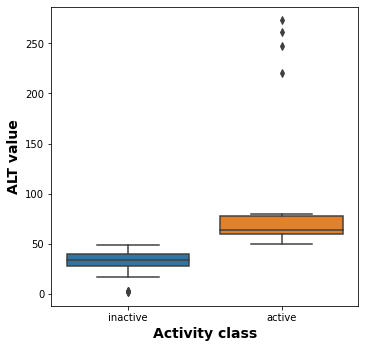

In [21]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'ALT', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('ALT value', fontsize=14, fontweight='bold')

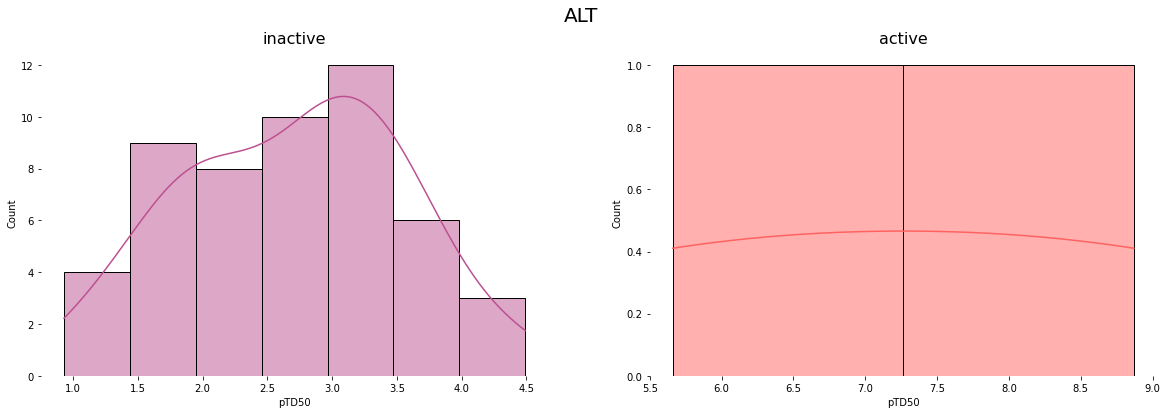

In [22]:
pTD50_1 = df_hep_td2[df_hep_td2['pTD50']<5]
pTD50_2 = df_hep_td2[df_hep_td2['pTD50']>=5]

fig, axes = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('ALT', fontsize=20)
left = sns.histplot(data=pTD50_1, x='pTD50', ax = axes[0], kde=True, color=colors_palette[2])
right = sns.histplot(data=pTD50_2, x='pTD50', ax = axes[1], kde=True, color=colors_palette[1])
axes[0].set_title('inactive', fontsize=16)
axes[1].set_title('active', fontsize=16)

sns.despine(left=True, bottom=True)

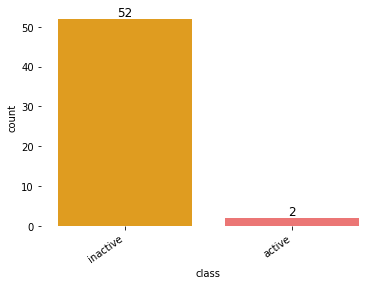

In [23]:
activity_th = []
for i in df_hep_td2.pTD50:
    if float(i) < 5:
        activity_th.append("inactive")
    elif float(i) >= 5:
        activity_th.append("active")
    
activity_class = pd.Series(activity_th, name='class')
class_df = pd.concat([df_hep_td2, activity_class], axis=1)

a = sns.countplot(x='class', data=class_df, palette=colors_palette)

annotate(a)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

Text(0, 0.5, 'pTD50 value')

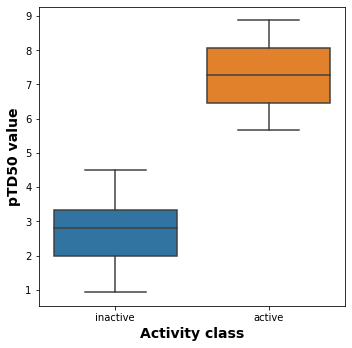

In [24]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pTD50', data = class_df)

plt.xlabel('Activity class', fontsize=14, fontweight='bold')
plt.ylabel('pTD50 value', fontsize=14, fontweight='bold')

### 2.2.4 Prepare other fingerprints

In [26]:
df_hep_pubchem_alt.drop('Name', axis=1, inplace=True)
df_hep_pubchem_alt.apply(pd.to_numeric, errors='coerce')
df_hep_pubchem_alt = df_hep_pubchem_alt.join(df_hep_alt2['ALT'])
df_hep_pubchem_alt

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            1           1           0           0           0           0   
1            1           1           0           0           0           0   
2            1           1           0           0           0           0   
3            1           1           1           0           0           0   
4            1           1           0           0           0           0   
..         ...         ...         ...         ...         ...         ...   
93           1           1           0           0           0           0   
94           1           1           0           0           0           0   
95           1           1           0           0           0           0   
96           1           1           0           0           0           0   
97           1           1           1           0           0           0   

    PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  PubchemFP10  PubchemFP11  \
0            0           0           0           1            1            1   
1            0           0           0           1            1            1   
2            0           0           0           1            1            1   
3            0           0           0           1            1            1   
4            0           0           0           1            1            1   
..         ...         ...         ...         ...          ...          ...   
93           0           0           0           1            1            1   
94           0           0           0           1            1            1   
95           0           0           0           1            1            1   
96           0           0           0           1            1            1   
97           0           0           0           1            1            1   

    PubchemFP12  PubchemFP13  PubchemFP14  PubchemFP15  PubchemFP16  \
0             1            0            1            1            0   
1             1            0            1            1            0   
2             1            0            1            0            0   
3             1            0            1            0            0   
4             0            0            0            0            0   
..          ...          ...          ...          ...          ...   
93            1            0            1            1            0   
94            1            0            1            1            0   
95            0            0            0            0            0   
96            1            0            1            1            0   
97            1            0            1            1            0   

    PubchemFP17  PubchemFP18  PubchemFP19  PubchemFP20  PubchemFP21  \
0             0            1            0            0            0   
1             0            1            0            0            0   
2             0            1            1            0            0   
3             0            1            1            1            0   
4             0            1            1            1            0   
..          ...          ...          ...          ...          ...   
93            0            1            0            0            0   
94            0            1            0            0            0   
95            0            1            1            1            0   
96            0            1            0            0            0   
97            0            1            1            0            0   

    PubchemFP22  PubchemFP23  PubchemFP24  PubchemFP25  PubchemFP26  \
0             0            0            0            0            0   
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0    

In [27]:
df_hep_pubchem_td.drop('Name', axis=1, inplace=True)
df_hep_pubchem_td.apply(pd.to_numeric, errors='coerce')
df_hep_pubchem_td = df_hep_pubchem_td.join(df_hep_td2['pTD50'])
df_hep_pubchem_td

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0            0           0           0           0           0           0   
1            1           0           0           0           0           0   
2            1           0           0           0           0           0   
3            1           0           0           0           0           0   
4            1           0           0           0           0           0   
5            1           1           1           0           0           0   
6            1           1           1           0           0           0   
7            0           0           0           0           0           0   
8            1           1           0           0           0           0   
9            1           1           0           0           0           0   
10           0           0           0           0           0           0   
11           1           0           0           0           0           0   
12           1           0           0           0           0           0   
13           1           0           0           0           0           0   
14           1           1           0           0           0           0   
15           1           1           1           0           0           0   
16           0           0           0           0           0           0   
17           1           0           0           0           0           0   
18           0           0           0           0           0           0   
19           0           0           0           0           0           0   
20           1           1           0           0           0           0   
21           1           0           0           0           0           0   
22           1           1           0           0           0           0   
23           1           1           0           0           0           0   
24           1           1           0           0           0           0   
25           1           0           0           0           0           0   
26           1           1           0           0           0           0   
27           1           1           0           0           0           0   
28           0           0           0           0           0           0   
29           1           1           0           0           0           0   
30           1           1           0           0           0           0   
31           0           0           0           0           0           0   
32           1           0           0           0           0           0   
33           1           1           0           0           0           0   
34           1           1           0           0           0           0   
35           1           1           0           0           0           0   
36           1           1           0           0           0           0   
37           0           0           0           0           0           0   
38           1           1           0           0           0           0   
39           1           1           0           0           0           0   
40           1           0           0           0           0           0   
41           1           1           0           0           0           0   
42           1           1           0           0           0           0   
43           0           0           0           0           0           0   
44           1           1           1           0           0           0   
45           1           0           0           0           0           0   
46           1           1           0           0           0           0   
47           1           0           0           0           0           0   
48           0           0           0           0           0           0   
49           0           0           0           0           0           0   
50           1           1

In [28]:
df_hep_klek_alt.apply(pd.to_numeric, errors='coerce')
df_hep_klek_alt.head()

ALT KRFP1 KRFP2 KRFP3 KRFP4 KRFP5 KRFP6 KRFP7 KRFP8 KRFP9 KRFP10 KRFP11  \
0  32.60     1     0     0     0     0     0     0     0     0      0      0   
1  37.20     1     0     0     0     0     0     0     0     0      0      0   
2   2.92     0     0     0     0     0     0     0     0     0      0      0   
3   3.16     0     0     0     0     0     0     0     0     0      0      0   
4  44.10     1     1     0     0     0     0     0     0     0      0      0   

  KRFP12 KRFP13 KRFP14 KRFP15 KRFP16 KRFP17 KRFP18 KRFP19 KRFP20 KRFP21  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP22 KRFP23 KRFP24 KRFP25 KRFP26 KRFP27 KRFP28 KRFP29 KRFP30 KRFP31  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP32 KRFP33 KRFP34 KRFP35 KRFP36 KRFP37 KRFP38 KRFP39 KRFP40 KRFP41  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      1      0      0      0      0      0      0      0   

  KRFP42 KRFP43 KRFP44 KRFP45 KRFP46 KRFP47 KRFP48 KRFP49 KRFP50 KRFP51  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP52 KRFP53 KRFP54 KRFP55 KRFP56 KRFP57 KRFP58 KRFP59 KRFP60 KRFP61  \
0      0      0      0      1      0      0      0      0      0      0   
1      0      0      0      1      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP62 KRFP63 KRFP64 KRFP65 KRFP66 KRFP67 KRFP68 KRFP69 KRFP70 KRFP71  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP72 KRFP73 KRFP74 KRFP75 KRFP76 KRFP77 KRFP78 KRFP79 KRFP80 KRFP81  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP82 KRFP83 KRFP84 KRFP85 KRFP86 KRFP87 KRFP88 KRFP89 KRFP90 KRFP91  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0   

In [30]:
df_hep_klek_td.apply(pd.to_numeric, errors='coerce')
df_hep_klek_td.head()

KRFP1 KRFP2 KRFP3 KRFP4 KRFP5 KRFP6 KRFP7 KRFP8 KRFP9 KRFP10 KRFP11  \
0  1.94     0     0     0     0     0     0     0     0     0      0      0   
1  1.58     0     0     0     0     0     0     0     0     0      0      0   
2  3.69     0     0     0     0     0     0     0     0     0      0      0   
3  2.46     0     0     0     0     0     0     0     0     0      0      0   
4  1.90     0     0     0     0     0     0     0     0     0      0      0   

  KRFP12 KRFP13 KRFP14 KRFP15 KRFP16 KRFP17 KRFP18 KRFP19 KRFP20 KRFP21  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP22 KRFP23 KRFP24 KRFP25 KRFP26 KRFP27 KRFP28 KRFP29 KRFP30 KRFP31  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP32 KRFP33 KRFP34 KRFP35 KRFP36 KRFP37 KRFP38 KRFP39 KRFP40 KRFP41  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP42 KRFP43 KRFP44 KRFP45 KRFP46 KRFP47 KRFP48 KRFP49 KRFP50 KRFP51  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP52 KRFP53 KRFP54 KRFP55 KRFP56 KRFP57 KRFP58 KRFP59 KRFP60 KRFP61  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP62 KRFP63 KRFP64 KRFP65 KRFP66 KRFP67 KRFP68 KRFP69 KRFP70 KRFP71  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP72 KRFP73 KRFP74 KRFP75 KRFP76 KRFP77 KRFP78 KRFP79 KRFP80 KRFP81  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

  KRFP82 KRFP83 KRFP84 KRFP85 KRFP86 KRFP87 KRFP88 KRFP89 KRFP90 KRFP91  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4

### 2.2.5 Save

In [31]:
df_hep_alt2.to_csv('../data/processed/hepato_alt_maccs_all.csv', index=False)
df_hep_td2.to_csv('../data/processed/hepato_ptd50_maccs_all.csv', index=False)

df_hep_pubchem_alt.to_csv('../data/processed/hepato_alt_pubchem_all.csv', index=False)
df_hep_pubchem_td.to_csv('../data/processed/hepato_ptd50_pubchem_all.csv', index=False)

df_hep_klek_alt.to_csv('../data/processed/hepato_alt_klek_all.csv', index=False)
df_hep_klek_td.to_csv('../data/processed/hepato_ptd50_klek_all.csv', index=False)

## 3. SDF file

Prepare SDF file with mols. 

### 3.1 Load data

In [32]:
suppl = Chem.SDMolSupplier('../data/raw/hepatotoxicity_chembl_data_ALT_onlynonempty98cmds.sdf')
ms_alt = [x for x in suppl if x is not None]
len(ms_alt)

98

In [33]:
suppl = Chem.SDMolSupplier('../data/raw/hepatotoxicity_chembl_data_pTD50_54cmds.sdf')
ms_td = [x for x in suppl if x is not None]
len(ms_td)

54

### 3.2 Preprocess

Convert mols to smiles.

In [46]:
smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms_alt]
df_hep_alt_smiles = pd.DataFrame(smiles, columns=['smiles'])
df_hep_alt_smiles.head()

smiles
0        Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1
1        Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1
2      COc1ccc(C=C2SC(=O)N(Cc3ccc(C)cc3)C2=O)c(OC)c1
3          Cc1ccc(CN2C(=O)SC(=Cc3ccc(Cl)cc3)C2=O)cc1
4  CCCOc1ccc(C=CC(=O)NCCCNc2c3c(nc4ccccc24)CCCC3)...

In [47]:
smiles = [MolToSmiles(x,isomericSmiles=False) for x in ms_td]
df_hep_td_smiles = pd.DataFrame(smiles, columns=['smiles'])
df_hep_td_smiles.head()

smiles
0          Nc1cc(Cl)c(N)c(Cl)c1
1                         ClCCl
2                    C=CC(=C)Cl
3  O=[N+]([O-])c1ccc2[nH]cnc2c1
4              Nc1ccc(Cl)c(N)c1

In [48]:
df_hep_alt_smiles = df_hep_alt_smiles.join(df_hep_alt2['ALT'])
df_hep_alt_smiles.head()

smiles    ALT
0        Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1  32.60
1        Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1  37.20
2      COc1ccc(C=C2SC(=O)N(Cc3ccc(C)cc3)C2=O)c(OC)c1   2.92
3          Cc1ccc(CN2C(=O)SC(=Cc3ccc(Cl)cc3)C2=O)cc1   3.16
4  CCCOc1ccc(C=CC(=O)NCCCNc2c3c(nc4ccccc24)CCCC3)...  44.10

In [49]:
df_hep_td_smiles = df_hep_td_smiles.join(df_hep_td2['pTD50'])
df_hep_td_smiles.head()

smiles  pTD50
0          Nc1cc(Cl)c(N)c(Cl)c1   1.94
1                         ClCCl   1.58
2                    C=CC(=C)Cl   3.69
3  O=[N+]([O-])c1ccc2[nH]cnc2c1   2.46
4              Nc1ccc(Cl)c(N)c1   1.90

### 3.3 Save

In [50]:
df_hep_alt_smiles.to_csv('../data/processed/hepato_alt_smiles_all.csv', index=False)
df_hep_td_smiles.to_csv('../data/processed/hepato_ptd50_smiles_all.csv', index=False)